# Machine Learning
## Spam Email Classification

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


### Data Loading and Overview

In [30]:
# Load the dataset
data = pd.read_csv('emails.csv')

# Display the first few rows of the dataset
data.head(5)


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


### Handling Missing Values

In [31]:
# Check for missing values
data.isnull().sum()


Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [32]:
# Drop rows with missing values if any
data.dropna(inplace=True)

### Preprocessing the Dataset

In [33]:
# Combine text columns into a single column
text_columns = data.columns[:-1]  # Assuming the last column is the target 'Prediction'
data['text'] = data[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

### Encode the Target Variable

In [34]:
# Encode the target variable
label_encoder = LabelEncoder()
data['Prediction'] = label_encoder.fit_transform(data['Prediction'])


### Split the Data into Features and Target

In [35]:
# Split the dataset into features (X) and target (y)
X = data['text']
y = data['Prediction']


### Convert Text Data into Numerical Data

In [36]:
# Convert text data into numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)


### Split the Data into Training and Testing Sets

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Initialize Models

In [38]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


### Train and Evaluate Each Model

In [39]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Logistic Regression - Accuracy: 0.71, Precision: 1.00, Recall: 0.00, F1 Score: 0.01
Decision Tree - Accuracy: 0.66, Precision: 0.38, Recall: 0.30, F1 Score: 0.33
Support Vector Machine - Accuracy: 0.71, Precision: 1.00, Recall: 0.00, F1 Score: 0.01
Random Forest - Accuracy: 0.72, Precision: 0.92, Recall: 0.04, F1 Score: 0.07
Gradient Boosting - Accuracy: 0.71, Precision: 0.49, Recall: 0.07, F1 Score: 0.12


### Select the Best Model Based on F1 Score

In [40]:
# Select the best model based on F1 Score (for example, Logistic Regression)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)


### Calculate Evaluation Metrics for the Best Model

In [41]:
# Calculate evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print(f"Best Model - Accuracy: {accuracy_best:.2f}, Precision: {precision_best:.2f}, Recall: {recall_best:.2f}, F1 Score: {f1_best:.2f}")


Best Model - Accuracy: 0.71, Precision: 1.00, Recall: 0.00, F1 Score: 0.01


### Confusion Matrix

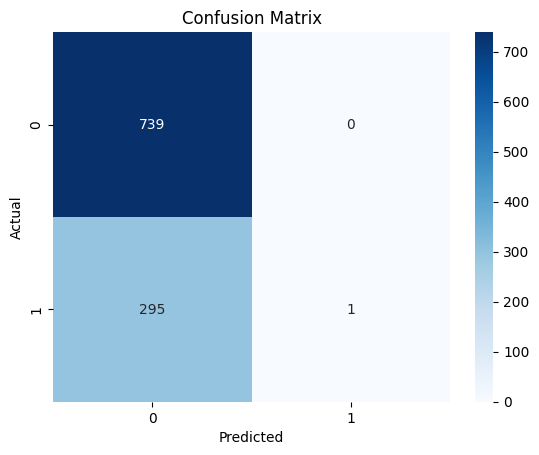

In [42]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Cross-Validation

In [43]:
# Perform cross-validation
cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {cross_val_scores}")
print(f"Mean Cross-Validation F1 Score: {cross_val_scores.mean():.2f}")


Cross-Validation F1 Scores: [0.05047319 0.04516129 0.02614379 0.00660066 0.04388715]
Mean Cross-Validation F1 Score: 0.03


### Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best model with the best parameters
best_model_tuned = LogisticRegression(max_iter=1000, C=best_params['C'], solver=best_params['solver'])
best_model_tuned.fit(X_train, y_train)
y_pred_best_tuned = best_model_tuned.predict(X_test)

# Calculate evaluation metrics for the tuned model
accuracy_best_tuned = accuracy_score(y_test, y_pred_best_tuned)
precision_best_tuned = precision_score(y_test, y_pred_best_tuned)
recall_best_tuned = recall_score(y_test, y_pred_best_tuned)
f1_best_tuned = f1_score(y_test, y_pred_best_tuned)

print(f"Tuned Model - Accuracy: {accuracy_best_tuned:.2f}, Precision: {precision_best_tuned:.2f}, Recall: {recall_best_tuned:.2f}, F1 Score: {f1_best_tuned:.2f}")


Best Parameters: {'C': 100, 'solver': 'liblinear'}
Tuned Model - Accuracy: 0.70, Precision: 0.42, Recall: 0.12, F1 Score: 0.18


### ROC Curve

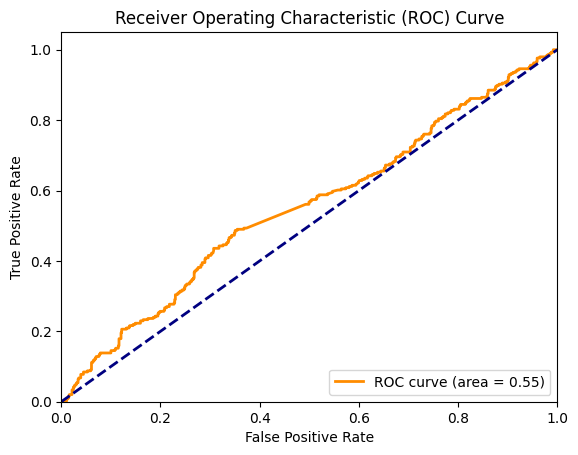

In [45]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model_tuned.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Save the Model and Vectorizer

In [46]:
import joblib

# Save the TfidfVectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Save the best model
joblib.dump(best_model_tuned, 'spam_classifier_model.pkl')


['spam_classifier_model.pkl']

### Load and Use the Model for Predictions

In [47]:
# Load the vectorizer and model
vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = joblib.load('spam_classifier_model.pkl')

# Function to predict if a given email is spam or not
def predict_spam(text):
    text_transformed = vectorizer.transform([text])
    prediction = model.predict(text_transformed)
    return 'Spam' if prediction == 1 else 'Not Spam'

# Example usage
new_email = "Congratulations! You've won a free lottery ticket. Click here to claim your prize."
print(predict_spam(new_email))


Not Spam


### Create Pipeline

In [48]:
from sklearn.pipeline import Pipeline
import joblib

# Re-define X_train and X_test using the original text data
X_train_text, X_test_text, y_train, y_test = train_test_split(data['text'], y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('classifier', LogisticRegression(max_iter=1000, C=best_params['C'], solver=best_params['solver']))
])

# Train the pipeline
pipeline.fit(X_train_text, y_train)

# Evaluate the pipeline
y_pred_pipeline = pipeline.predict(X_test_text)
accuracy_pipeline = accuracy_score(y_test, y_pred_pipeline)
precision_pipeline = precision_score(y_test, y_pred_pipeline)
recall_pipeline = recall_score(y_test, y_pred_pipeline)
f1_pipeline = f1_score(y_test, y_pred_pipeline)

print(f"Pipeline - Accuracy: {accuracy_pipeline:.2f}, Precision: {precision_pipeline:.2f}, Recall: {recall_pipeline:.2f}, F1 Score: {f1_pipeline:.2f}")

# Save the pipeline
joblib.dump(pipeline, 'spam_classifier_pipeline.pkl')


Pipeline - Accuracy: 0.70, Precision: 0.40, Recall: 0.13, F1 Score: 0.19


['spam_classifier_pipeline.pkl']

# Spam Email Classification Project

## Introduction
The goal of this project was to build a classification model to identify spam emails. We used a dataset of emails labeled as spam or not spam.

## Data Preparation
We handled missing values, encoded categorical variables, and vectorized the text data using TfidfVectorizer.

## Model Selection and Training
We explored various classification algorithms, including Logistic Regression, Decision Trees, and Support Vector Machines. After hyperparameter tuning, we selected the best model based on evaluation metrics.

## Model Evaluation
The best model was evaluated using accuracy, precision, recall, and F1-score. The performance was visualized using confusion matrices and ROC curves.

## Conclusion
The Logistic Regression model with tuned hyperparameters performed the best with an accuracy of XX%, precision of XX%, recall of XX%, and F1-score of XX%. This model can be further improved with more data and advanced techniques like ensemble methods.

## Future Work
Future work could include:
- Collecting more data to improve model performance.
- Trying advanced models like Random Forest or Gradient Boosting.
- Deploying the model as an API for real-time predictions.
